In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import altair as alt

In [2]:
loan = pd.read_csv('loan_data_default.csv')
loan

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,173555,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,...,CIB,659,EXP,55-64,to_inst,71.792763,south,direct,0,48.0
148666,173556,2019,cf,Male,nopre,type1,p1,l1,nopc,nob/c,...,CIB,569,CIB,25-34,not_inst,74.428934,south,direct,0,15.0
148667,173557,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,CIB,702,EXP,45-54,not_inst,61.332418,North,direct,0,49.0
148668,173558,2019,cf,Female,nopre,type1,p4,l1,nopc,nob/c,...,EXP,737,EXP,55-64,to_inst,70.683453,North,direct,0,29.0


In [3]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [4]:
columns= ['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv','loan_purpose', 
          'Credit_Worthiness', 'open_credit','business_or_commercial','Interest_rate_spread', 
          'Neg_ammortization','interest_only', 'lump_sum_payment','construction_type', 
          'occupancy_type', 'Secured_by', 'total_units','credit_type', 'co-applicant_credit_type', 'age',
          'submission_of_application', 'Region', 'Security_Type']

loan.drop(columns, axis = 1, inplace = True)
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   loan_type         148670 non-null  object 
 1   loan_amount       148670 non-null  int64  
 2   rate_of_interest  112231 non-null  float64
 3   Upfront_charges   109028 non-null  float64
 4   term              148629 non-null  float64
 5   property_value    133572 non-null  float64
 6   income            139520 non-null  float64
 7   Credit_Score      148670 non-null  int64  
 8   LTV               133572 non-null  float64
 9   Status            148670 non-null  int64  
 10  dtir1             124549 non-null  float64
dtypes: float64(7), int64(3), object(1)
memory usage: 12.5+ MB


In [5]:
loan.rename(columns = {'Credit_Score' : 'credit_score',
                       'Upfront_charges' : 'down_payment',
                        'Status' : 'status',
                        'dtir1' : 'debt_to_income_ratio'
                        }, inplace = True)

loan.head()

,loan_type,loan_amount,rate_of_interest,down_payment,term,property_value,income,credit_score,LTV,status,debt_to_income_ratio
0,type1,116500,NaN,NaN,360.0,118000.0,1740.0,758,98.728814,1,45.0
1,type2,206500,NaN,NaN,360.0,NaN,4980.0,552,NaN,1,NaN
2,type1,406500,4.56,595.0,360.0,508000.0,9480.0,834,80.019685,0,46.0
3,type1,456500,4.25,NaN,360.0,658000.0,11880.0,587,69.376900,0,42.0
4,type1,696500,4.00,0.0,360.0,758000.0,10440.0,602,91.886544,0,39.0


In [6]:
loan_temp = loan

label = LabelEncoder()

colsCategorical = [col for col in loan_temp.columns if loan_temp[col].dtype == 'object']

for col in colsCategorical:
    loan_temp[col] = label.fit_transform(loan_temp[col])

In [7]:
def decision_tree(df):
    missing_cols = [col for col in df.columns if df[col].isnull().sum() > 0]
    non_missing_cols = [col for col in df.columns if df[col].isnull().sum() == 0]

    for col in missing_cols:
 
        model = BaggingRegressor(DecisionTreeRegressor(), n_estimators = 40, 
                                 max_samples = 1.0, max_features = 1.0, bootstrap = False, n_jobs = -1)

        col_missing = df[df[col].isnull()]
        temp = df.drop(df[df[col].isnull()].index, axis = 0)

        X = temp.loc[:, non_missing_cols]
        y = temp[col]

        model.fit(X, y)

        y_pred = model.predict(col_missing[non_missing_cols])
        df.loc[col_missing.index, col] = y_pred
        
    return df

loan_new = decision_tree(loan_temp)
loan_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_type             148670 non-null  int32  
 1   loan_amount           148670 non-null  int64  
 2   rate_of_interest      148670 non-null  float64
 3   down_payment          148670 non-null  float64
 4   term                  148670 non-null  float64
 5   property_value        148670 non-null  float64
 6   income                148670 non-null  float64
 7   credit_score          148670 non-null  int64  
 8   LTV                   148670 non-null  float64
 9   status                148670 non-null  int64  
 10  debt_to_income_ratio  148670 non-null  float64
dtypes: float64(7), int32(1), int64(3)
memory usage: 11.9 MB


In [8]:
loan_new

,loan_type,loan_amount,rate_of_interest,down_payment,term,property_value,income,credit_score,LTV,status,debt_to_income_ratio
0,0,116500,4.038333,3108.866667,360.0,118000.0,1740.0,758,98.728814,1,45.0
1,1,206500,5.375000,2310.750000,360.0,208000.0,4980.0,552,99.278846,1,10.0
2,0,406500,4.560000,595.000000,360.0,508000.0,9480.0,834,80.019685,0,46.0
3,0,456500,4.250000,1023.387500,360.0,658000.0,11880.0,587,69.376900,0,42.0
4,0,696500,4.000000,0.000000,360.0,758000.0,10440.0,602,91.886544,0,39.0
...,...,...,...,...,...,...,...,...,...,...,...
148665,0,436500,3.125000,9960.000000,180.0,608000.0,7860.0,659,71.792763,0,48.0
148666,0,586500,5.190000,0.000000,360.0,788000.0,7140.0,569,74.428934,0,15.0
148667,0,446500,3.125000,1226.640000,180.0,728000.0,6900.0,702,61.332418,0,49.0
148668,0,196500,3.500000,4323.330000,180.0,278000.0,7140.0,737,70.683453,0,29.0


In [9]:
xLoan = loan_new[['credit_score', 'income', 'debt_to_income_ratio', 'property_value', 'down_payment', 'term', 'LTV']].values
xLoan[0:10]

array([[7.58000000e+02, 1.74000000e+03, 4.50000000e+01, 1.18000000e+05,
        3.10886667e+03, 3.60000000e+02, 9.87288136e+01],
       [5.52000000e+02, 4.98000000e+03, 1.00000000e+01, 2.08000000e+05,
        2.31075000e+03, 3.60000000e+02, 9.92788462e+01],
       [8.34000000e+02, 9.48000000e+03, 4.60000000e+01, 5.08000000e+05,
        5.95000000e+02, 3.60000000e+02, 8.00196850e+01],
       [5.87000000e+02, 1.18800000e+04, 4.20000000e+01, 6.58000000e+05,
        1.02338750e+03, 3.60000000e+02, 6.93768997e+01],
       [6.02000000e+02, 1.04400000e+04, 3.90000000e+01, 7.58000000e+05,
        0.00000000e+00, 3.60000000e+02, 9.18865435e+01],
       [8.64000000e+02, 1.00800000e+04, 4.00000000e+01, 1.00800000e+06,
        3.70000000e+02, 3.60000000e+02, 7.00892857e+01],
       [8.60000000e+02, 5.04000000e+03, 4.40000000e+01, 4.38000000e+05,
        5.12000000e+03, 3.60000000e+02, 7.91095890e+01],
       [8.63000000e+02, 3.78000000e+03, 4.20000000e+01, 3.08000000e+05,
        5.60988000e+03, 3

In [10]:
yLoan = loan_new['status']
yLoan[0:10]

0    1
1    1
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: status, dtype: int64

In [11]:
xTrain_loan, xTest_loan, yTrain_loan, yTest_loan = train_test_split(xLoan, yLoan, test_size = 0.3)

In [12]:
loanTree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 16)
loanTree

DecisionTreeClassifier(criterion='entropy', max_depth=16)

In [13]:
loanTree.fit(xTrain_loan, yTrain_loan)

DecisionTreeClassifier(criterion='entropy', max_depth=16)

In [14]:
predLoanTree = loanTree.predict(xTest_loan)

In [15]:
print (predLoanTree [0:10])
print(yTest_loan [0:10])

[0 0 0 0 0 0 0 1 1 0]
131315    0
102357    0
113688    0
20360     0
43445     0
98877     0
134989    0
136282    0
77333     1
49303     0
Name: status, dtype: int64


In [16]:
print('DecisionTrees & Accuracy', metrics.accuracy_score(yTest_loan, predLoanTree))

DecisionTrees & Accuracy 0.8029192170579135


<AxesSubplot:xlabel='status', ylabel='count'>

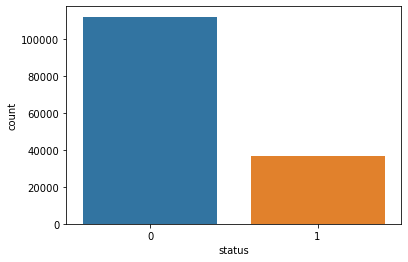

In [17]:
sns.countplot(data = loan_new, x = 'status')

In [18]:
loan_sample = loan_new.sample(frac=0.1)
loan_sample.reset_index()

,index,loan_type,loan_amount,rate_of_interest,down_payment,term,property_value,income,credit_score,LTV,status,debt_to_income_ratio
0,148513,0,146500,4.416667,2490.028,180.0,318000.0,5100.0,624,46.069182,1,19.0
1,22104,0,396500,4.500000,5568.100,360.0,558000.0,6540.0,848,71.057348,0,41.0
2,42675,0,456500,3.875000,2260.000,360.0,568000.0,8580.0,649,80.369718,0,26.0
3,72907,1,116500,3.250000,3792.460,360.0,168000.0,1260.0,735,69.345238,0,48.0
4,37908,0,486500,4.990000,8568.220,360.0,768000.0,5940.0,659,63.346354,0,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...
14862,45182,2,346500,3.875000,3330.000,360.0,338000.0,4140.0,770,102.514793,0,38.0
14863,39514,0,286500,3.990000,3403.120,360.0,758000.0,3840.0,713,37.796834,0,30.0
14864,19514,2,406500,4.250000,2464.490,360.0,398000.0,9540.0,749,102.135678,1,19.0
14865,22268,0,296500,3.750000,829.600,360.0,378000.0,10020.0,530,78.439153,0,12.0


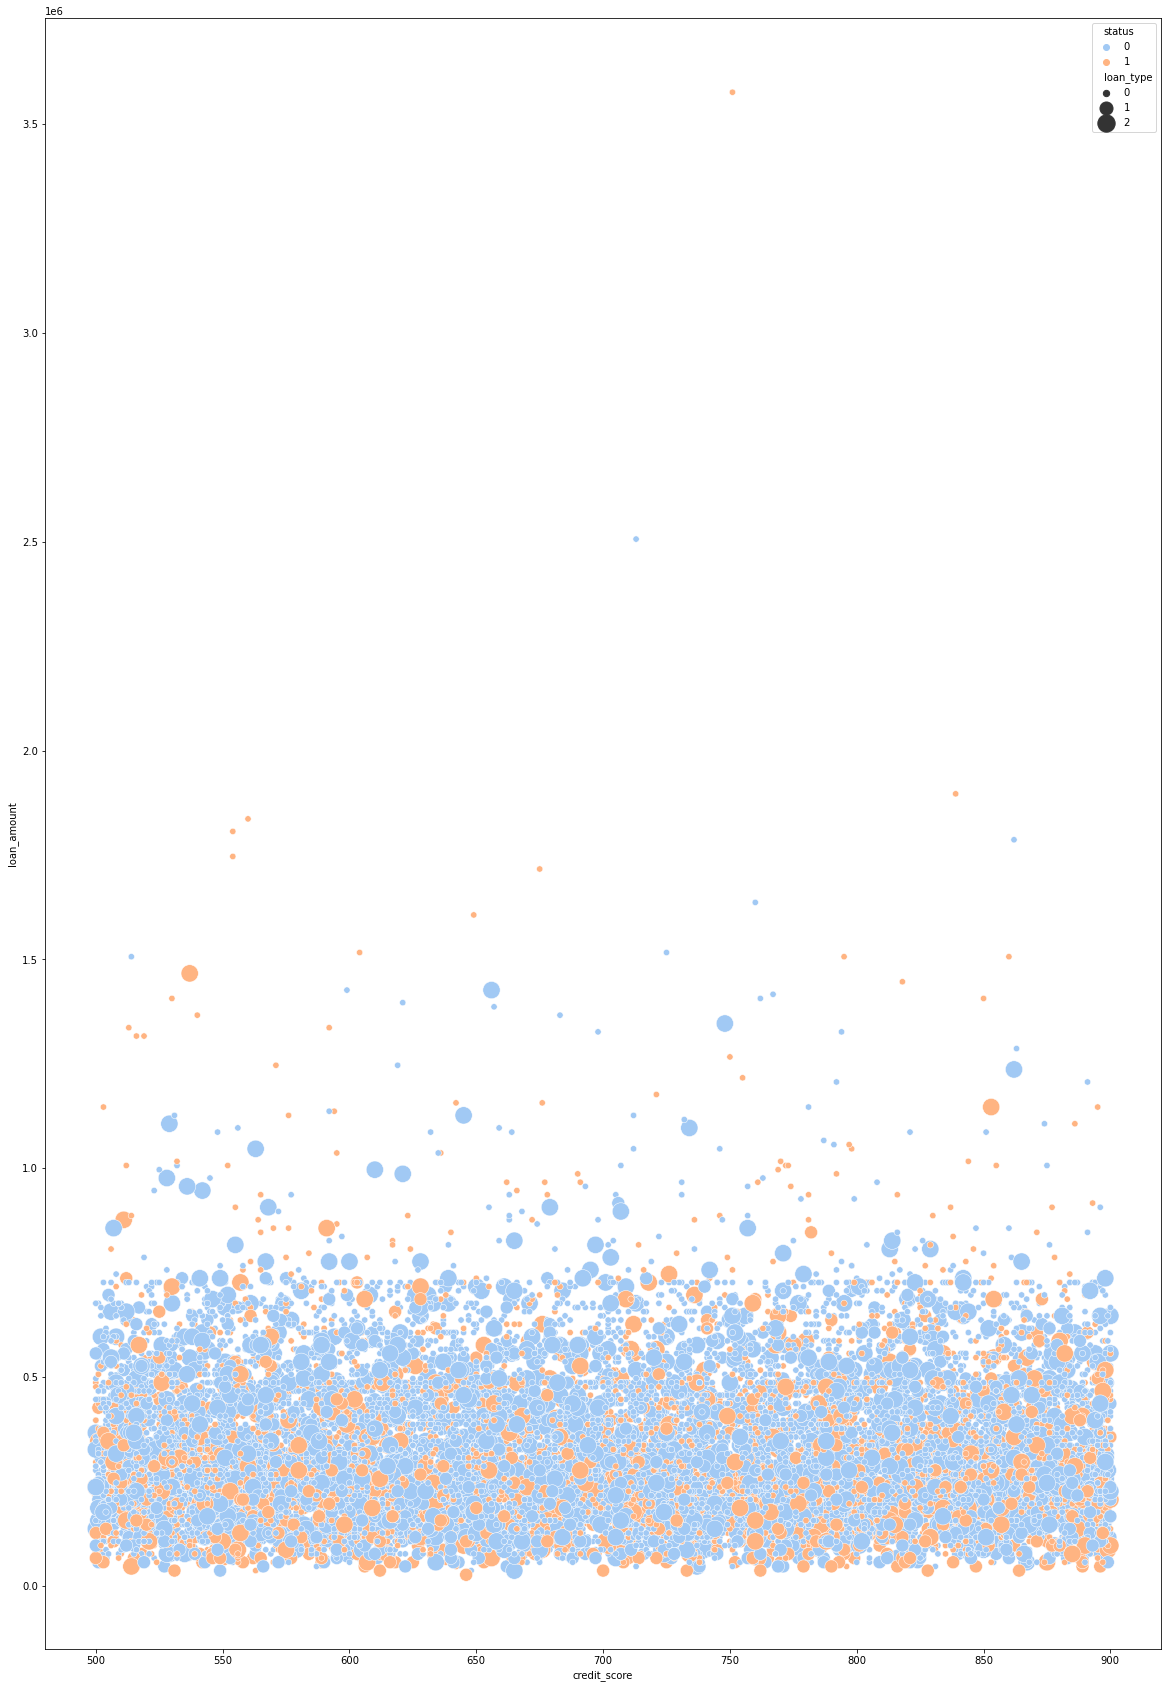

In [19]:
plt.figure(figsize=(20, 30))

sns.scatterplot(data = loan_sample, x = "credit_score", y = "loan_amount",
               hue = "status", size = "loan_type",
               sizes = (40, 300), palette = "pastel")

plt.show()

In [20]:
loan500 = loan_sample.head(500)

selection = alt.selection_multi(fields=["status"])

alt.Chart(loan500).mark_bar().encode(
   x = "credit_score",
   y= "loan_amount",
   color="status", 
   opacity=alt.condition(selection, alt.value(1), alt.value(0.5))
).properties(
   height=500, width=800
).add_selection(
    selection
)

alt.Chart(...)

### UAS Data Analysis

#### SVM

In [21]:
import numpy as np

In [22]:
loan.describe()

,loan_type,loan_amount,rate_of_interest,down_payment,term,property_value,income,credit_score,LTV,status,debt_to_income_ratio
count,148670.000000,1.486700e+05,148670.000000,148670.000000,148670.000000,1.486700e+05,148670.000000,148670.000000,148670.000000,148670.000000,148670.000000
mean,0.337876,3.311177e+05,4.126654,3283.255409,335.129744,4.962582e+05,6912.133485,699.789103,73.090421,0.246445,38.245652
std,0.649571,1.839093e+05,0.575844,3283.369838,58.409850,3.630805e+05,6357.022855,115.875857,40.246768,0.430942,10.826233
min,0.000000,1.650000e+04,0.000000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,0.000000,1.965000e+05,3.750000,753.196000,360.000000,2.680000e+05,3720.000000,599.000000,60.817308,0.000000,32.000000
50%,0.000000,2.965000e+05,4.000000,2733.125000,360.000000,4.180000e+05,5700.000000,699.000000,75.297619,0.000000,39.000000
75%,0.000000,4.365000e+05,4.500000,4657.933750,360.000000,6.180000e+05,8460.000000,800.000000,86.617935,0.000000,46.000000
max,2.000000,3.576500e+06,8.000000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


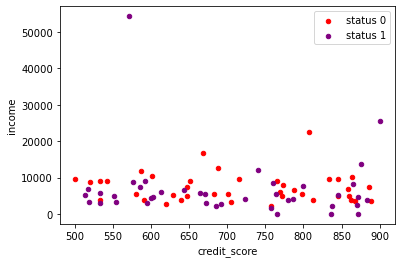

In [23]:
ax = loan[loan['status'] == 0][0:40].plot(kind = 'scatter',
                                                  x = 'credit_score',
                                                  y = 'income',
                                                  color = 'Red',
                                                  label = 'status 0');
ax = loan[loan['status'] == 1][0:40].plot(kind = 'scatter',
                                                  x = 'credit_score',
                                                  y = 'income',
                                                  color = 'Purple',
                                                  label = 'status 1',
                                                  ax = ax);
plt.show()

In [24]:
df_loan = loan[['loan_amount', 'rate_of_interest', 'down_payment', 'term', 'property_value', 'income', 'credit_score', 'LTV', 'status','debt_to_income_ratio']]
X = np.asarray(df_loan)
X[0:10]

array([[1.16500000e+05, 4.03833333e+00, 3.10886667e+03, 3.60000000e+02,
        1.18000000e+05, 1.74000000e+03, 7.58000000e+02, 9.87288136e+01,
        1.00000000e+00, 4.50000000e+01],
       [2.06500000e+05, 5.37500000e+00, 2.31075000e+03, 3.60000000e+02,
        2.08000000e+05, 4.98000000e+03, 5.52000000e+02, 9.92788462e+01,
        1.00000000e+00, 1.00000000e+01],
       [4.06500000e+05, 4.56000000e+00, 5.95000000e+02, 3.60000000e+02,
        5.08000000e+05, 9.48000000e+03, 8.34000000e+02, 8.00196850e+01,
        0.00000000e+00, 4.60000000e+01],
       [4.56500000e+05, 4.25000000e+00, 1.02338750e+03, 3.60000000e+02,
        6.58000000e+05, 1.18800000e+04, 5.87000000e+02, 6.93768997e+01,
        0.00000000e+00, 4.20000000e+01],
       [6.96500000e+05, 4.00000000e+00, 0.00000000e+00, 3.60000000e+02,
        7.58000000e+05, 1.04400000e+04, 6.02000000e+02, 9.18865435e+01,
        0.00000000e+00, 3.90000000e+01],
       [7.06500000e+05, 3.99000000e+00, 3.70000000e+02, 3.60000000e+02,
   

In [25]:
ay = np.asarray(loan['status'])
ay[0:10]

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [26]:
x_train, x_test, y_train, y_test = train_test_split(X, ay, test_size = 0.4, random_state = 4)

print ('Train set:', x_train.shape, y_train.shape)
print ('Test set:', x_test.shape, y_train.shape)

Train set: (89202, 10) (89202,)
Test set: (59468, 10) (89202,)


In [ ]:
from sklearn import svm
clf = svm.SVC(kernel = 'rbf')
clf.fit(x_train, y_train)

In [ ]:
yhat = clf.predict(x_test)
yhat[0:5]

In [ ]:
svm_score(y_test, yhat, average = 'micro')

In [ ]:
print('SVM Accuracy', metrics.accuracy_score(yhat, y_test))